In [214]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib inline

In [215]:
# physics
K = 1.0
G = 0.5
rho = 1.0
dmp = 0.005

# numerics 
lx = 10.0
ly = 10.0
nx = 200
ny = 200
nsteps = 2500
cfl = 0.5

#preprocessing
x = np.linspace( -0.5 * lx, 0.5 * lx, nx) 
y = np.linspace( -0.5 * ly, 0.5 * ly, ny) 
x, y = np.meshgrid(x, y, indexing = 'ij')

dx = lx / (nx - 1)
dy = ly / (ny - 1)

dt = cfl * min(dx, dy) / np.sqrt(( K + 4.0 * G / 3.0) / rho)

# init
p0 = 0.0
p = p0 * np.exp(- x * x - y * y)

tauxx = np.zeros((nx, ny))
tauyy = np.zeros((nx, ny))
tauxy = np.zeros((nx - 1, ny - 1))

vx = np.zeros((nx + 1, ny))
vy = np.zeros((nx, ny + 1))

ux = np.zeros((nx + 1, ny))
uy = np.zeros((nx, ny + 1))
ux[0,:] = 0.1

In [216]:
# Define initial conditions
def initialize():
    global p, tauxx, tauyy, tauxy, vx, vy, ux, uy
    p = p0 * np.exp(-x**2 - y**2)
    tauxx = np.zeros((nx, ny))
    tauyy = np.zeros((nx, ny))
    tauxy = np.zeros((nx - 1, ny - 1))
    vx = np.zeros((nx + 1, ny))
    vy = np.zeros((nx, ny + 1))
    
    ux = np.zeros((nx + 1, ny))
    uy = np.zeros((nx, ny + 1))
    ux[0,:] = 0.1

In [217]:
def iteration():
    
    global p, tauxx, tauyy, tauxy, vx, vy, ux, uy
    div_u = np.diff(ux, axis=0) / dx + np.diff(uy, axis=1) / dy
    
    p = - div_u * K
    
    tauxx = (np.diff(ux, axis=0) / dx - div_u / 3.0) * 2.0 * G
    tauyy = (np.diff(uy, axis=1) / dy - div_u / 3.0) * 2.0 * G
    tauxy = (np.diff(ux[1:-1, :], axis=1) / dy + np.diff(uy[:, 1:-1], axis=0) / dx) * G

    dvxdt = (np.diff(-p[:, 1:-1] + tauxx[:, 1:-1], axis=0) / dx +
             np.diff(tauxy, axis=1) / dy) / rho
    dvydt = (np.diff(-p[1:-1, :] + tauyy[1:-1, :], axis=1) / dy +
             np.diff(tauxy, axis=0) / dx) / rho
    
    vx[1:-1, 1:-1] = (1 - dmp) * vx[1:-1, 1:-1] + dvxdt * dt
    vy[1:-1, 1:-1] = (1 - dmp) * vy[1:-1, 1:-1] + dvydt * dt
    ux[1:-1, 1:-1] = ux[1:-1, 1:-1] + vx[1:-1, 1:-1] * dt
    uy[1:-1, 1:-1] = uy[1:-1, 1:-1] + vy[1:-1, 1:-1] * dt
    

In [218]:
# Update function for animation
def update(frame):
    iteration()
    mesh.set_array(ux[0:-1,:].ravel())  # Update data for colormap
    return mesh,

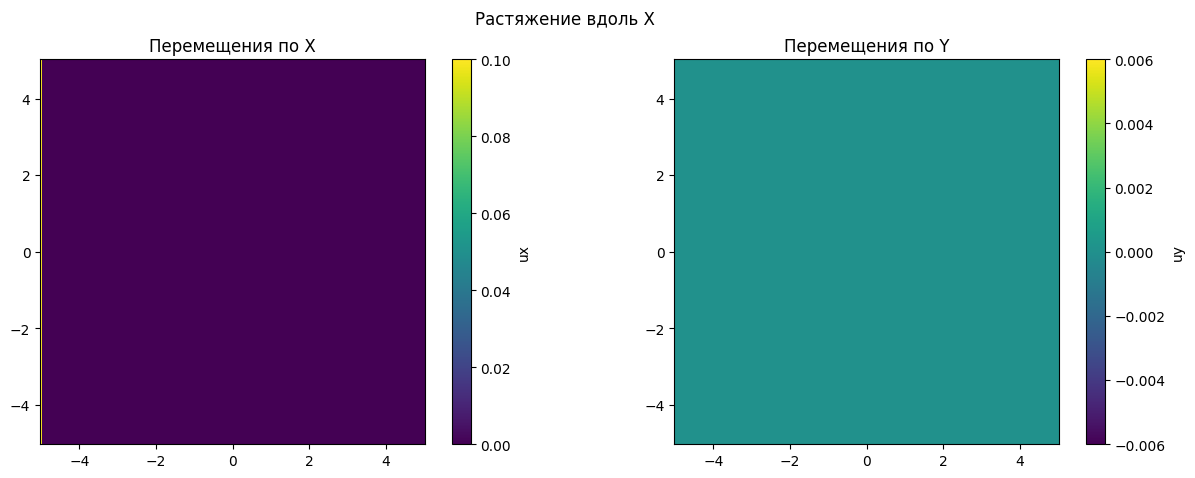

In [219]:
# Initialize plots for p, ux, uy
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Растяжение вдоль X")

mesh_ux = axs[0].pcolormesh(x, y, ux[:-1, :] ,shading='auto')
axs[0].set_title("Перемещения по X")
axs[0].set_aspect('equal')
cbar_ux = plt.colorbar(mesh_ux, ax=axs[0])
cbar_ux.set_label("ux")


mesh_uy = axs[1].pcolormesh(x, y, uy[:, :-1], vmin = -0.006, vmax = 0.006, shading='auto')
axs[1].set_title("Перемещения по Y")
axs[1].set_aspect('equal')
cbar_uy = plt.colorbar(mesh_uy, ax=axs[1])
cbar_uy.set_label("uy")

In [220]:
# Update function
def update(frame):
    iteration()
    mesh_ux.set_array(ux[:-1, :].ravel())
    mesh_uy.set_array(uy[:, :-1].ravel())
    return mesh_p, mesh_ux, mesh_uy

# Create animation
initialize()
ani = FuncAnimation(fig, update, frames=nsteps, blit=True, interval=10)
ani.save("wave2d_u.mp4")